<a href="https://colab.research.google.com/github/pranabsarma18/Machine-Learning-Technique/blob/main/Python%20Implementation/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [581]:
import numpy as np
import matplotlib.pyplot as plt

In [582]:
plt.rcParams["figure.figsize"] = (10, 10)

In [583]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1])

### Problem-1

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. What is the value of $n$ and $d$?

In [584]:
X.shape

(2, 20)

### Problem-2

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. 

- Inspect the data visually and determine its linear separability.
- How will you use a perceptron to determine linear separability?

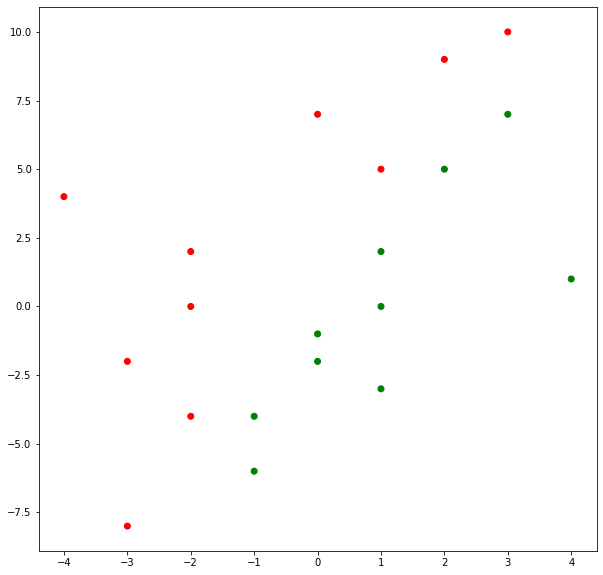

In [585]:
plt.scatter(X[0,:], X[1,:], c=['g' if i == +1 else 'r' for i in y])

### Problem-3

Compute the object $\mathbf{Y}$ that appears in the dual problem. What kind of an object is $\mathbf{Y}$?

In [586]:
Y = np.diag(y)
Y.shape

(20, 20)

### Problem-4

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem and find the sum of its elements. What properties does the matrix $\mathbf{Q}$ have? What is the nature of the objective function?

In [587]:
Q = Y.T @ X.T @ X @ Y

In [588]:
Q.sum()

976

### Problem-5

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

<hr>

Write a function `f` that returns the value of objective function $f(\boldsymbol{\alpha})$ for argument $\boldsymbol{\alpha}$. Compute the value of `f` at $\boldsymbol{\alpha} = \mathbf{1}$.

In [589]:
def objective1(alpha=np.ones(20).reshape(-1,1)):
    return 0.5* alpha.T@Q@alpha - alpha.T@np.ones(20).reshape(-1,1)

In [590]:
objective1()

array([[468.]])

### Problem-6

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$


Compute the sum of components of the optimal solution, $\boldsymbol{\alpha}^*$. Enter the nearest integer as your answer.

In [591]:
def obj(alpha, X=X, y=y):
    Y = np.diag(y)
    Q = Y.T @ X.T @ X @ Y

    return 0.5 * alpha.T @ Q @ alpha - alpha.T @ np.ones(X.shape[1])

In [592]:
from scipy import optimize

In [593]:
alpha_init = np.zeros(X.shape[1])
res = optimize.minimize(obj, alpha_init, bounds = optimize.Bounds(0, np.inf))
res.x

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285513, 1.65714114, 1.67142776, 1.68571371,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428495, 1.62856852])

In [594]:
alpha_opt = res.x
alpha_opt.sum()

9.999991220349333

In [595]:
alpha_opt.shape

(20,)

### Problem-7

Find all the support vectors. Print the indices (zero-indexing) of the columns in the data-matrix where these support vectors are found.

In [596]:
#np.where?

In [597]:
support_vector_indices = np.where(alpha_opt !=0)
support_vector_indices[0]

array([ 6,  7,  8,  9, 18, 19])

### Problem-8

Find the optimal weight vector $\mathbf{w}^*$. Round each component of the optimal weight vector to the nearest integer.

In [598]:
def opt_weight(alpha, X=X, y=y):
    alpha = alpha.reshape(-1,1)
    Y = np.diag(y)
    #print(Y.shape)
    return X @ Y @ alpha

In [599]:
w_opt = opt_weight(alpha_opt)
w_opt

array([[ 2.99998843],
       [-1.00002594]])

In [600]:
w_opt[0,0]

2.999988426077779

### Problem-9

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot. How many red points lie on the supporting hyperplanes? How many green points lie on the supporting hyperplanes?

In [601]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

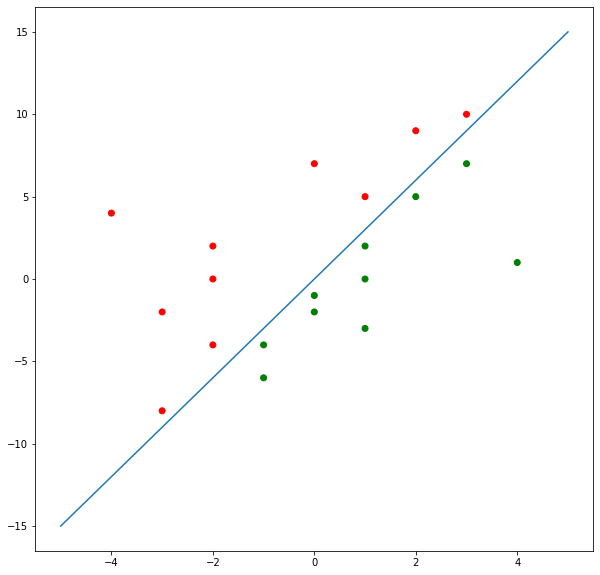

In [602]:
color = np.array(['dummy', 'green', 'red'])
plt.scatter(X[0,:], X[1,:], c=color[y])

# x*w[0] + y*w[1] = 0
# y = -x*w[0] / w[1]
w_x = np.linspace(-5,5)
w_y = -w_x*(w_opt[0,0]/w_opt[1,0])

plt.plot(w_x, w_y);

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [603]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1,
              1, 1])

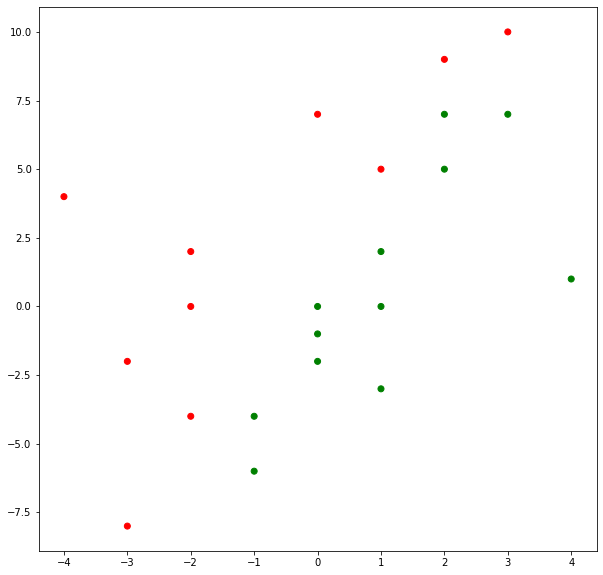

In [604]:
color = np.array(['dummy', 'green', 'red'])
plt.scatter(X[0,:], X[1,:], c=color[y])

### Problem-10

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


In [605]:
def obj(alpha):
    Y = np.diag(y)
    Q = Y.T @ X.T @ X @ Y

    return 0.5 * alpha @ Q @ alpha - alpha.sum()

In [606]:
def opt_weight(alpha):
    Y = np.diag(y)
    return X @ Y @ alpha

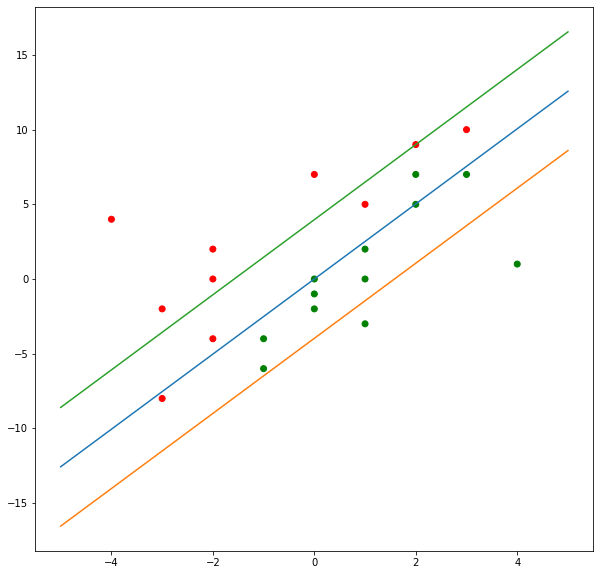

In [607]:
alpha_init = np.zeros(X.shape[1])
res = optimize.minimize(obj, alpha_init, bounds = optimize.Bounds(0, 0.1))
alpha_opt = res.x
w_opt = opt_weight(alpha_opt)
w_opt

In [608]:
def plot(X, y, w_opt):
    color = np.array(['dummy', 'green', 'red'])
    plt.scatter(X[0,:], X[1,:], c=color[y])
    w_x = np.linspace(-5,5)
    w_y = (-w_x*w_opt[0])/w_opt[1]
    plt.plot(w_x, w_y);

    # x*w[0] + y*w[1] = 1
    # y = (1-x*w[0]) / w[1]
    w_x = np.linspace(-5,5)
    w_y = (1 - w_x*w_opt[0])/w_opt[1]
    plt.plot(w_x, w_y);

    w_x = np.linspace(-5,5)
    w_y = (-1 - w_x*w_opt[0])/w_opt[1]
    plt.plot(w_x, w_y);

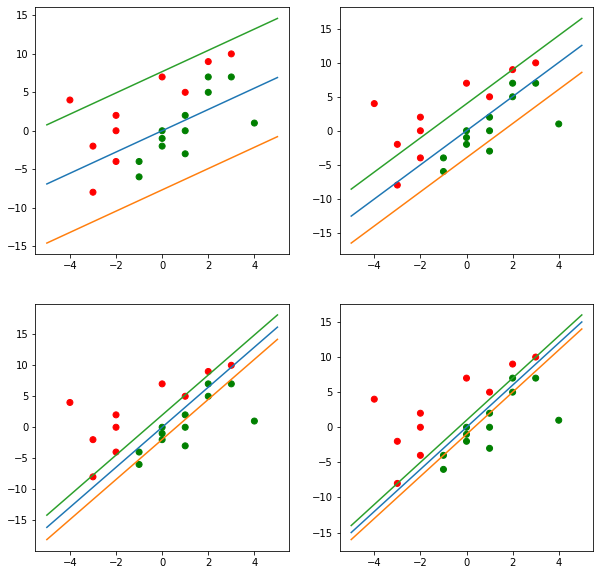

In [609]:
C = [0.01, 0.1, 1, 10]
i = 1
for c in C:
    alpha_init = np.zeros(X.shape[1])
    res = optimize.minimize(obj, alpha_init, bounds = optimize.Bounds(0, c))
    alpha_opt = res.x
    w_opt = opt_weight(alpha_opt)

    plt.subplot(2,2,i)
    i = i + 1

    plot(X, y, w_opt)

### Problem-11

For $C = 10$, how many support vectors does the model have? Observe where these points lie.

[ 0.          0.          0.          0.          0.          0.
  1.69419944  2.7050731   3.71593597  4.72681093  0.          0.
  0.          0.          0.          0.          0.          0.
  6.64006256  0.51783356 10.         10.        ]


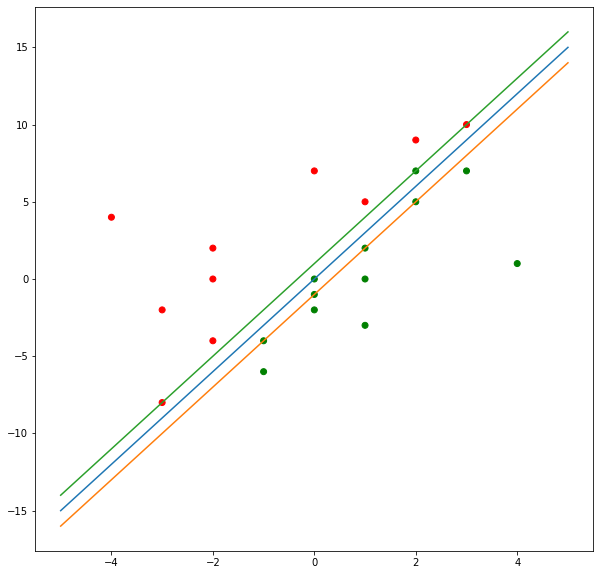

In [611]:
alpha_init = np.zeros(X.shape[1])
res = optimize.minimize(obj, alpha_init, bounds = optimize.Bounds(0, 10))
alpha_opt = res.x
w_opt = opt_weight(alpha_opt)
print(alpha_opt)
plot(X, y, w_opt)

### Problem-12

For $C = 10$, find the most critical support vectors, that is, those points for which $\alpha^{*}_i = C$.

In [612]:
np.where(alpha_opt == 10,)

(array([20, 21]),)

In [616]:
X[:,[20,21]].T

array([[0, 0],
       [2, 7]])